### PROJECT :   CLASSIFICATION (SUPERVISED MACHINE LEARNING)
#### DESCRIPTION :
Building and evaluating a classification model. \
The project is an example of a binary classification and a `Logistic Regression` was considered to predict whether there is going to be a rainfall the next day.


In [79]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, log_loss, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline


pd.set_option("display.max_columns", None)
%matplotlib inline

In [2]:
#reading in the dataset
rain_df = pd.read_csv("Weather_Data.csv", parse_dates=["Date"])

In [120]:
#first 5 rows of the dataset
rain_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### EXPLORATORY DATA ANALYSIS

In [4]:
#shape of the dataset
print(f"The dataset has {rain_df.shape[0]} rows and {rain_df.shape[1]} columns")

The dataset has 3271 rows and 22 columns


In [5]:
#dtypes of the columns
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3271 non-null   datetime64[ns]
 1   MinTemp        3271 non-null   float64       
 2   MaxTemp        3271 non-null   float64       
 3   Rainfall       3271 non-null   float64       
 4   Evaporation    3271 non-null   float64       
 5   Sunshine       3271 non-null   float64       
 6   WindGustDir    3271 non-null   object        
 7   WindGustSpeed  3271 non-null   int64         
 8   WindDir9am     3271 non-null   object        
 9   WindDir3pm     3271 non-null   object        
 10  WindSpeed9am   3271 non-null   int64         
 11  WindSpeed3pm   3271 non-null   int64         
 12  Humidity9am    3271 non-null   int64         
 13  Humidity3pm    3271 non-null   int64         
 14  Pressure9am    3271 non-null   float64       
 15  Pressure3pm    3271 n

There are 5 columns in the dataset that are object datatypes which will require encoding into numbers because machine learning models do not accept 
categorical values as inputs and 16 columns with int and float datatypes. The target column is `RainTomorrow` which have classes `Yes` and `No`.

In [6]:
#summary statistics of the numeric columns in the dataset
rain_df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,2012-10-21 10:18:05.172730112,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-07 12:00:00,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-10-18 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-21 12:00:00,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053


Dropping the column: `Date` because it is considered as low priority feature to this analysis

In [7]:
#dropping the column: Date 
rain_df.drop(["Date"], axis=1, inplace=True)

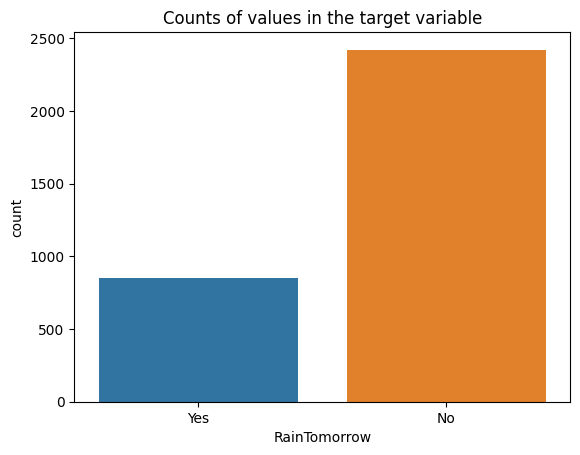

In [8]:
#checking the counts of the values in the target variable
ax = sns.countplot(data=rain_df, x="RainTomorrow")
ax.set_title("Counts of values in the target variable")
plt.show()

The counts of rain not falling depicted by `No` in the dataset is much more than that of rain falling the next day valued by `Yes`.

In [9]:
#check for missing numbers
rain_df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

There are no missing values in the dataset

In [10]:
#number of unique values in each features with object datatype
rain_objects = rain_df.select_dtypes(exclude=["int", "float"])
rain_objects.drop("RainTomorrow", axis=1, inplace=True)

unique_dict = {}
for column in rain_objects.columns.tolist():
    unique_counts = rain_objects[column].nunique()
    unique_dict[column] = unique_counts

unique_dict

{'WindGustDir': 16, 'WindDir9am': 16, 'WindDir3pm': 16, 'RainToday': 2}

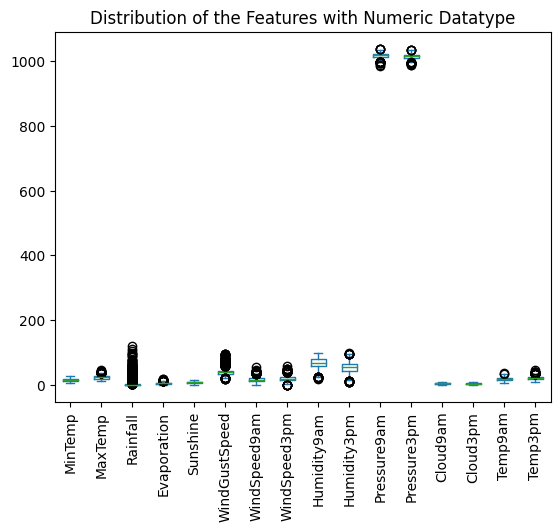

In [11]:
rain_nums = rain_df.select_dtypes(include=["int", "float"])
rain_nums.plot.box(rot=90)
plt.title("Distribution of the Features with Numeric Datatype")
plt.show()

There seems to be a fair interquartile range distribution among the features, although there are lots of outliers in the column: `Rainfall` 

### PREPROCESSING
One Hot Encoding : This preprocessing step is done to encode the values of the features with object datatype into ones and zeros \
Label Encoding : This is done to encode the classes of the target variable into numbers since the it is a binary outcome: NO or YES into 0 or 1.

In [12]:
#encoding the categorical features
rain_df = pd.get_dummies(data=rain_df, columns=rain_objects.columns)

In [14]:
#encoding the target variables into 0 and 1
encoder = LabelEncoder()
rain_df["RainTomorrow"] = encoder.fit_transform(rain_df["RainTomorrow"])
rain_df["RainTomorrow"].unique().tolist()

[1, 0]

In [18]:
rain_df = rain_df.astype(float)

In [20]:
#selecting the features and target variables
X = rain_df.drop("RainTomorrow", axis=1)
y = rain_df["RainTomorrow"]

In [21]:
#split the dataset into training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
print("The shape of the X training set is {}".format(X_train.shape))
print("The shape of the X testing set is {}".format(X_test.shape))
print("The shape of the y training set is {}".format(y_train.shape))
print("The shape of the y testing set is {}".format(y_test.shape))

The shape of the X training set is (2289, 66)
The shape of the X testing set is (982, 66)
The shape of the y training set is (2289,)
The shape of the y testing set is (982,)


#### FITTING and PREDICTIONS

In [80]:
#instantiate the model with liblinear as the solver
LogReg = LogisticRegression(solver="liblinear")

#fit the model to the training data
LogReg.fit(X_train, y_train)

#predict estimated values
y_pred = LogReg.predict(X_test)

#predict prediction probabilities
y_probs = LogReg.predict_proba(X_test)[:, 1]

### Evaluation

In [81]:
accuracy_score = accuracy_score(y_test, y_pred)

log_loss = log_loss(y_test, y_probs)

print(f"The classification model had {accuracy_score:.2f} as the accuracy score and {log_loss:.2f} as the log loss respectively.")

The classification model had 0.83 as the accuracy score and 0.39 as the log loss respectively.


In [115]:
#confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

[[662  55]
 [110 155]]


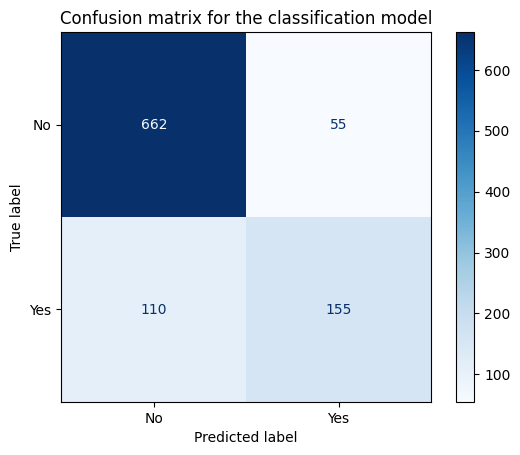

In [117]:
c_plot = ConfusionMatrixDisplay(c_matrix, display_labels=["No", "Yes"])
c_plot.plot(cmap="Blues")
plt.title("Confusion matrix for the classification model")
plt.show()

155 and 662 classes were true positives and true negatives respectively (correctly predicted).
55 were false positives and false negatives respectively (incorrectly predicted)

In [119]:
report = classification_report(y_test, y_pred)
print("Classification report for the classification model\n")
print(report)

Classification report for the classification model

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       717
         1.0       0.74      0.58      0.65       265

    accuracy                           0.83       982
   macro avg       0.80      0.75      0.77       982
weighted avg       0.83      0.83      0.83       982



High precision = Lower false positive rate (Not many rainfalls that did not fell are predicted to be yes) \
High recall = Lower false negative rate (Predicted most rainfalls that did fell correctly)

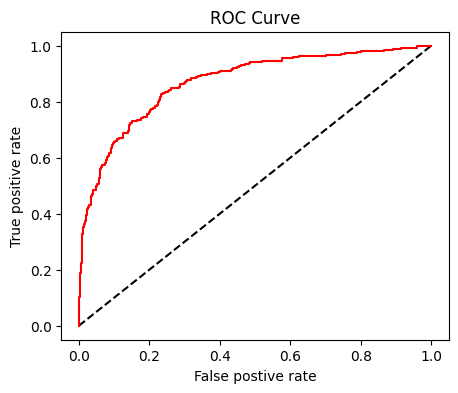

In [113]:
fpr, tpr, threholds = roc_curve(y_test, y_probs)
plt.figure(figsize=[5,4])
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, "r")
plt.ylabel("True positive rate")
plt.xlabel("False postive rate")
plt.title("ROC Curve")
plt.show()

In [112]:
roc_score = roc_auc_score(y_test, y_probs)
print(f"The ROC score for area under the curve for the classification model is {roc_score:.2f}")

The ROC score for area under the curve for the classification model is 0.87


The ROC score for the classification model is quite high (closer to 1) which indicates a good performance in distinguishing the positive and negative classes 

<h4> HYPERPARAMETER TUNING </h4>
Hyperparamter tuning of the model was done through Cross Validation and Grid Search Cross Validation to find a better score and parameters for the classification model

In [124]:
#cross validation
#creating a KFold object
kf = KFold(n_splits=10, shuffle=True)

#steps for the pipeline
steps = [("scaler", StandardScaler()),
         ("LogReg", LogisticRegression(solver="liblinear"))
          ]
#instantiating the pipeline object
pipeline = Pipeline(steps)

#cross validation object
cv = cross_val_score(pipeline, X, y, cv=kf)

#average and mean of the 10 cross validation results
mean = np.mean(cv)
std = np.std(cv)
quantiles = np.quantile(cv, [0.025, 0.975])

print("The cross validation performed over 10 folds for the classification model\nhad an average testing score of {:.2f} with a standard \
deviation of {:.2f} and the 25th\nand 75th percentiles of the scores are {:.2f} and {:.2f}".format(mean, std, quantiles[0], quantiles[1]))

The cross validation performed over 10 folds for the classification model
had an average testing score of 0.84 with a standard deviation of 0.01 and the 25th
and 75th percentiles of the scores are 0.82 and 0.86


In [111]:
#grid search cross validation
#paramters for the grid search
params = {"LogReg__penalty": ['l1', 'l2'],
         "LogReg__C": np.arange(0.1, 1.0, 0.1)
         }

grid_cv = GridSearchCV(pipeline, param_grid=params)

grid_cv.fit(X_train, y_train)

best_score = grid_cv.best_score_
best_params = grid_cv.best_params_

print(f"The best score of the Grid Search CV over 10 folds for the classification model is {best_score:.2f}")
print(f"The best parameters for the classification model through Grid Search CV are {best_params}")

The best score of the Grid Search Cross Validation over 10 folds for the classification model is 0.84
The best params for the classificatio model are {'LogReg__C': 0.2, 'LogReg__penalty': 'l1'}
